In [101]:
# Importamos los paquetes usuales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import missingno as msno
%matplotlib inline

In [102]:
# Leer los archivos p y w
df_p = pd.read_csv('p_data.csv', delimiter = ";")
df_w = pd.read_csv('w_data.csv', delimiter = ";")

In [103]:
# Análisis exploratorio básico
df_p.head()


,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [104]:
df_w.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


# Observamos que hay 16 columnas de datos en total


In [105]:
# Ordenamos el dataFrame df_p
df_p_ordered = df_p.sort_values('ID')
df_p_ordered.drop_duplicates(inplace = True)
print(df_p_ordered.shape)

# Ordenamos el dataFrame df_q
df_w_ordered = df_w.sort_values('ID')
df_w_ordered.drop_duplicates(inplace = True)
print(df_w_ordered.shape)

(48842, 9)
(48843, 7)


In [106]:
# Hacemos una serie con los duplicados
serie_duplicados_df_p = df_p['ID'].duplicated()
serie_duplicados_df_w = df_w['ID'].duplicated()
print(df_p[serie_duplicados_df_p].shape)
print(df_w[serie_duplicados_df_w].shape)

(0, 9)
(0, 7)


Concluimos que no hay duplicados en ninguno de los dos df.

In [107]:
# Ahora probamos fusionar los dataframes en base a la variable id
df3 = pd.merge(df_p, df_w, on = "ID")
df3.head()



,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family,State-gov,77516.0,2174.0,0.0,40.0,<=50K
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,Self-emp-not-inc,83311.0,0.0,0.0,13.0,<=50K
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family,Private,215646.0,0.0,0.0,40.0,<=50K
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband,Private,234721.0,0.0,0.0,40.0,<=50K
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,Private,338409.0,0.0,0.0,40.0,<=50K


In [108]:
df3.shape

(48842, 15)

Podemos observar que tienen todos los valores en común. Excepto un valor que está df_w y no en df_p

In [109]:
df3.groupby(['Target']).count()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week
Target,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
<=50K.,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841
>50K.,3845,3845,3845,3845,3845,3845,3845,3845,3845,3845,3845,3845,3845,3845


Observamos que hay 4 tipos de targets. Podemos reducirlo a dos con una función.

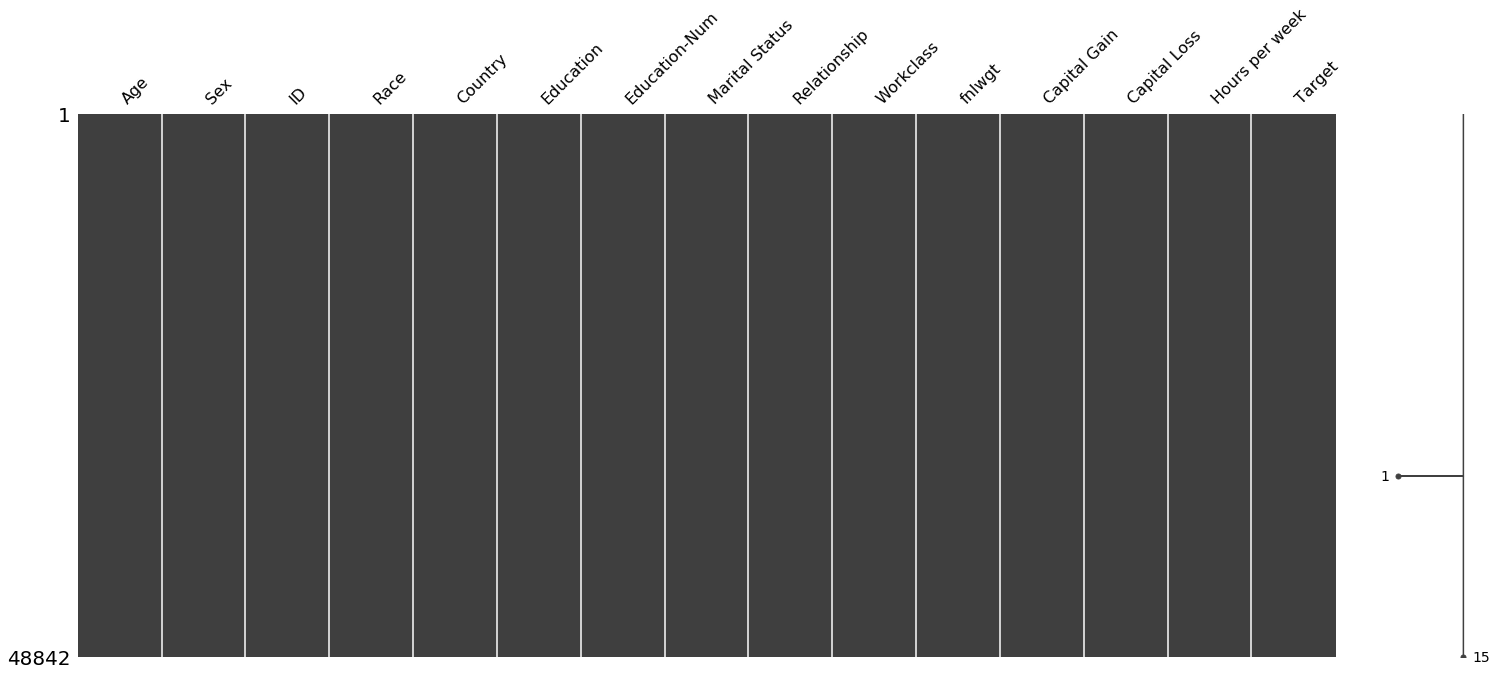

In [110]:
msno.matrix(df3)

In [111]:
df3[df3.isna() == True].count()

Age               0
Sex               0
ID                0
Race              0
Country           0
Education         0
Education-Num     0
Marital Status    0
Relationship      0
Workclass         0
fnlwgt            0
Capital Gain      0
Capital Loss      0
Hours per week    0
Target            0
dtype: int64

In [112]:
for index, row in df3.iterrows():
    for column in row.index:
        if (row[column] is None):
            print(index)

In [113]:
def reemplazar(param1):
    try:
        if ('<' in param1):
            return "<=50K"
        else:
            return  ">50K"
    except:
        return 2
df3['new_target'] = df3['Target'].apply(lambda element: reemplazar(element))
df3.groupby(['new_target']).count()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
new_target,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
<=50K,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155
>50K,11686,11686,11686,11686,11686,11686,11686,11686,11686,11686,11686,11686,11686,11686,11686


In [114]:
print((df3[df3['new_target'] == 2]).index)
print(df3.shape)
df3.drop(labels = (df3[df3['new_target'] == 2]).index, axis = 0, inplace = True)
print(df3.shape)

Int64Index([32561], dtype='int64')
(48842, 16)
(48841, 16)


Ahora calculamos las proporciones de los diferentes combinaciones de variables y variable de salida.